In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [12]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    n为多项式的次数"""
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.02379365]


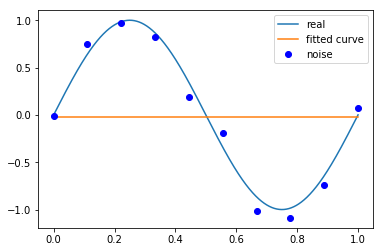

In [13]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.41184115  0.68212692]


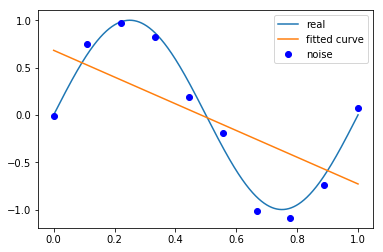

In [14]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 22.40333772 -33.26889653  11.0025904   -0.04251537]


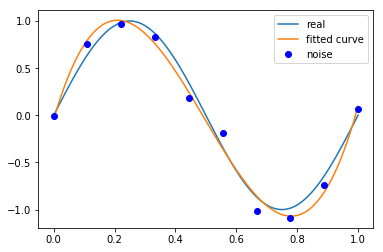

In [15]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [ 4.99305536e+04 -2.23104726e+05  4.18138138e+05 -4.26845073e+05
  2.57738315e+05 -9.34126728e+04  1.96281461e+04 -2.17405732e+03
  1.01460935e+02 -1.20240370e-02]


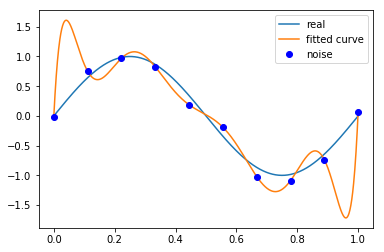

In [16]:
# M=9
p_lsq_9 = fitting(M=9)

In [17]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sort(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

In [18]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

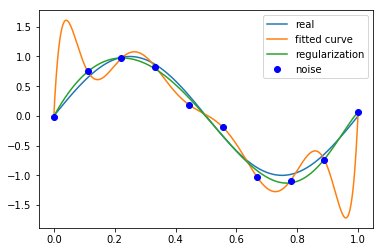

In [19]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [20]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [19]:
np.random.rand(4)

array([0.28765445, 0.33829222, 0.040549  , 0.35517646])

In [18]:
fit_func(np.random.rand(4),x)

array([0.70986368, 0.81793925, 0.93708521, 1.06761831, 1.20985531,
       1.36411295, 1.53070797, 1.70995714, 1.9021772 , 2.10768489])

In [7]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M 为多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    print()
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.02746259]


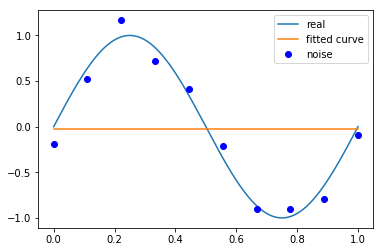

In [8]:
# M = 0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.31527153  0.63017317]


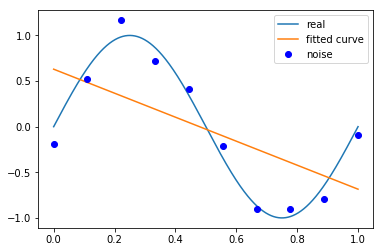

In [9]:
# M = 1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 21.57969619 -33.19814685  11.79510875  -0.23854757]


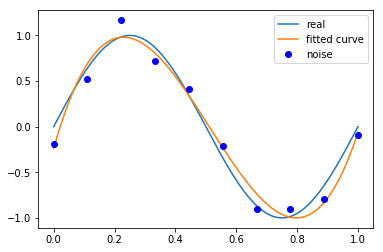

In [10]:
# M = 3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-5.97309139e+03  3.47978392e+04 -8.28308354e+04  1.05422641e+05
 -7.82974759e+04  3.45558218e+04 -8.74838741e+03  1.12088387e+03
 -4.73004753e+01 -1.86807740e-01]


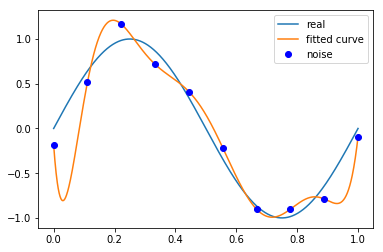

In [22]:
# M = 9
p_lsq_9 = fitting(M=9)

In [23]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))
    return ret

In [24]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

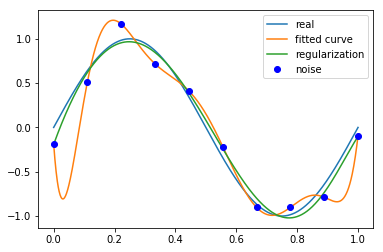

In [25]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()